In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
planes=pd.read_csv("planes.csv")

In [3]:
planes.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [7]:
#relative frequency
planes["Destination"].value_counts()
planes["Destination"].value_counts(normalize=True)

Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: Destination, dtype: float64

In [8]:
#cross-tubulation;frequency of combination of classes
pd.crosstab(planes["Source"],planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [9]:
#Aggregated values with cross-tabulation
pd.crosstab(planes["Source"],planes["Destination"],values=planes["Price"],aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_15476\137929536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(planes.corr(),annot=True)


<Axes: >

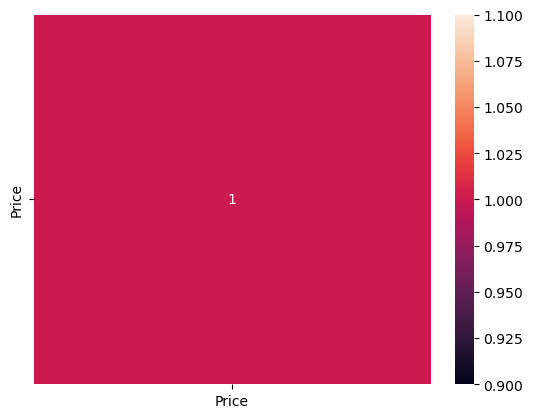

In [10]:
#Generating New features
sns.heatmap(planes.corr(),annot=True)

In [39]:
#planes.dropna(subset=["Total_Stops", "Duration"], inplace=True)

#planes["Total_Stops"]=planes["Total_Stops"].str.replace(" stops","")
#planes["Total_Stops"]=planes["Total_Stops"].str.replace(" stop","")
#planes["Total_Stops"]=planes["Total_Stops"].str.replace("non-stop","0")
#planes["Total_Stops"]=planes["Total_Stops"].astype(int)

In [40]:
#planes.dropna(subset=["Total_Stops", "Duration"], inplace=True)

#planes["Duration"]=planes["Duration"].str.replace("h","")
#planes["Duration"]=planes["Duration"].str.replace(" ","")
#planes["Duration"]=planes["Duration"].str.replace("m","")
#planes["Duration"]=planes["Duration"].astype(int)


In [41]:
planes.dropna(subset=["Total_Stops", "Duration"], inplace=True)

# Clean non-numeric characters
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "").str.replace("non-stop", "0")
planes["Duration"] = planes["Duration"].str.replace("h", "").str.replace("m", "").str.replace(" ", "")

# Convert to integers
planes["Total_Stops"] = planes["Total_Stops"].astype(int)
planes["Duration"] = planes["Duration"].astype(int)

AttributeError: Can only use .str accessor with string values!

In [36]:
planes.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration             int32
Total_Stops          int32
Additional_Info     object
Price              float64
dtype: object

In [37]:
planes.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,525,1,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,445,1,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,225,0,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,1530,1,In-flight meal not included,11087.0


In [57]:
planes["Date_of_journey"]=pd.to_datetime(planes["Date_of_Journey"],format="%d/%m/%Y")

In [59]:
planes.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
Date_of_journey    datetime64[ns]
dtype: object

In [60]:
#Use correlation to check relationships
planes["month"]=planes["Date_of_Journey"].dt.month
planes["month"]=planes["Date_of_Journey"].dt.weekday

AttributeError: Can only use .dt accessor with datetimelike values

In [43]:
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,525,1,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,445,1,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,225,0,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,1530,1,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,230,0,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,235,0,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3,0,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,240,0,No info,12648.0


In [62]:
#planes["Dep_Hour"]=planes["Dep_Time"].dt.hour
#planes["Arrival_Hour"]=planes["Arrival_Time"].dt.hour

In [64]:
# creating categories
print(planes["Price"].describe())

count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64


In [65]:
#Descriptive stat
t_25=planes["Price"].quantile(0.25)
t_50=planes["Price"].quantile(0.5)
t_75=planes["Price"].quantile(0.75)
t_max=planes["Price"].max()

In [71]:
#Creating Labels and bins
Labels=["Economy","Premium Economy","Business Class","First Class"]
bins=[0,t_25,t_50,t_75,t_75,t_max]
planes["Price_Category"]=pd.cut(planes["Price"],labels=Labels,bins=bins)

ValueError: Bin edges must be unique: array([    0.  ,  5276.75,  8366.  , 12373.  , 12373.  , 54826.  ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [73]:
#print(planes[["Price","Price_Category"]].head())

In [74]:
#sns.countplot(data=planes,x="Airline",hue="Price_Category")

Data snooping is the acts of excessive exploratory analysis,
the generation of multiple hypothesis and
the execution of multiple statistical test

In [76]:
#generating Hypothesis
#sns.barplot(data=planes,x="Airline",y="Duration")

In [ ]:
#Design an experiment
-Choose a sample
-Calculating how many data points we need
-Deciding what statistical test to run